
## Background

In this simulation, we extend the single-reservoir CO₂ exchange model to multiple reservoirs.
Geochemical cycles often involve multiple interacting reservoirs, such as the atmosphere,
ocean, and terrestrial biosphere. Each reservoir exchanges material with others, following
a system of coupled differential equations.

Here, we consider three interconnected reservoirs:
- **Atmosphere (A)**
- **Ocean (O)**
- **Terrestrial Biosphere (B)**

The exchange rates are governed by proportionality constants, assuming that each flux is
proportional to the concentration difference between reservoirs. This system can be written as:

$$ \[
\frac{dA}{dt} = -k_1 A + k_2 O
\]
\[
\frac{dO}{dt} = k_1 A - k_2 O - k_3 O + k_4 B
\]
\[
\frac{dB}{dt} = k_3 O - k_4 B
\] $$

where \( k_i \) are the transfer rate constants between reservoirs.

This system will be solved numerically using explicit Euler, implicit Euler, and SciPy's `solve_ivp`.


<>:22: SyntaxWarning: invalid escape sequence '\['
<>:22: SyntaxWarning: invalid escape sequence '\['
C:\Users\hansof\AppData\Local\Temp\ipykernel_24452\4003905696.py:22: SyntaxWarning: invalid escape sequence '\['
  """


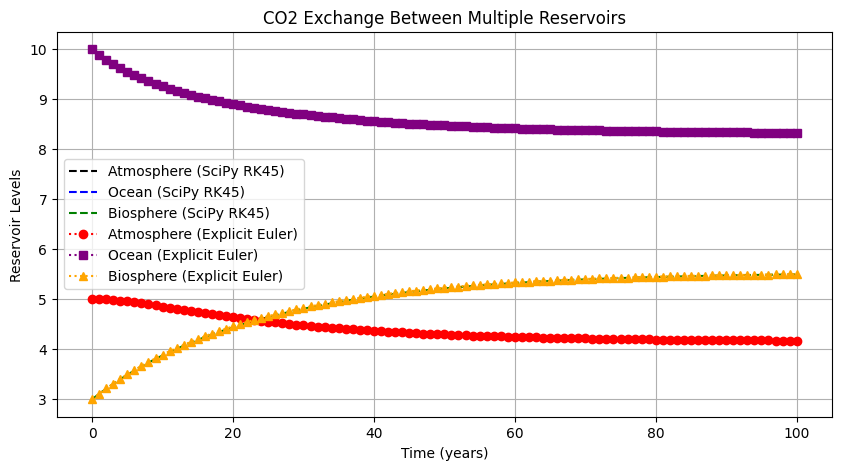

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



# Define the system of ODEs
def reservoir_exchange(t, y, k1, k2, k3, k4):
    A, O, B = y
    dA_dt = -k1 * A + k2 * O
    dO_dt = k1 * A - k2 * O - k3 * O + k4 * B
    dB_dt = k3 * O - k4 * B
    return [dA_dt, dO_dt, dB_dt]

# Parameters
k1, k2, k3, k4 = 0.1, 0.05, 0.02, 0.03  # Example rate constants
initial_conditions = [5, 10, 3]  # Initial amounts in A, O, B
time_span = (0, 100)

# Explicit Euler Method
def explicit_euler_system(f, t0, y0, h, t_end, params):
    """
    ## Explicit Euler Method for Systems
    
    The system is approximated by:
    \[ y_{n+1} = y_n + h f(t_n, y_n) \]
    where \( y \) is a vector of reservoir concentrations.
    
    This method is simple but can be unstable for stiff systems.
    """
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * np.array(f(t_values[i-1], y_values[i-1], *params))
    
    return t_values, y_values

# Solve using SciPy's solve_ivp
sol = solve_ivp(reservoir_exchange, time_span, initial_conditions, args=(k1, k2, k3, k4), dense_output=True)
t_scipy = np.linspace(time_span[0], time_span[1], 100)
y_scipy = sol.sol(t_scipy)

# Simulate using Explicit Euler
h = 1  # Step size
t_explicit, y_explicit = explicit_euler_system(reservoir_exchange, 0, initial_conditions, h, 100, (k1, k2, k3, k4))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(t_scipy, y_scipy[0], label='Atmosphere (SciPy RK45)', linestyle='dashed', color='black')
plt.plot(t_scipy, y_scipy[1], label='Ocean (SciPy RK45)', linestyle='dashed', color='blue')
plt.plot(t_scipy, y_scipy[2], label='Biosphere (SciPy RK45)', linestyle='dashed', color='green')
plt.plot(t_explicit, y_explicit[:, 0], label='Atmosphere (Explicit Euler)', marker='o', linestyle='dotted', color='red')
plt.plot(t_explicit, y_explicit[:, 1], label='Ocean (Explicit Euler)', marker='s', linestyle='dotted', color='purple')
plt.plot(t_explicit, y_explicit[:, 2], label='Biosphere (Explicit Euler)', marker='^', linestyle='dotted', color='orange')
plt.xlabel('Time (years)')
plt.ylabel('Reservoir Levels')
plt.title('CO2 Exchange Between Multiple Reservoirs')
plt.legend()
plt.grid()
plt.show()